In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import files
uploaded = files.upload()

Saving EEG Eye State.arff to EEG Eye State.arff


In [4]:
import pandas as pd
import io

dataframe = pd.read_csv(io.StringIO(uploaded['EEG Eye State.arff'].decode('utf-8')), names=["AF3", "ta", "F3", "FC5", "T7", "P7", "O1", "O2", "P8", "T8", "FC6", "F4", "F8", "AF4", "EyeDetection"])
dataframe

,AF3,ta,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,EyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1


In [5]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AF3           14980 non-null  float64
 1   ta            14980 non-null  float64
 2   F3            14980 non-null  float64
 3   FC5           14980 non-null  float64
 4   T7            14980 non-null  float64
 5   P7            14980 non-null  float64
 6   O1            14980 non-null  float64
 7   O2            14980 non-null  float64
 8   P8            14980 non-null  float64
 9   T8            14980 non-null  float64
 10  FC6           14980 non-null  float64
 11  F4            14980 non-null  float64
 12  F8            14980 non-null  float64
 13  AF4           14980 non-null  float64
 14  EyeDetection  14980 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


In [22]:
a=dataframe.values
X=a[:,:-1]   
y=a[:,-1]
print(X[1])
print(y)

[4324.62 4004.62 4293.85 4148.72 4342.05 4586.67 4097.44 4638.97 4210.77
 4226.67 4207.69 4279.49 4632.82 4384.1 ]
[0. 0. 0. ... 1. 1. 1.]


In [23]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in range(X.shape[1]):
    X[:,i] = encoder.fit_transform(X[:,i], )
print(X)

[[252. 179. 166. ... 132. 308. 320.]
 [243. 170. 175. ... 130. 302. 301.]
 [249. 174. 178. ... 135. 294. 311.]
 ...
 [151. 143.  83. ...  88. 222. 214.]
 [165. 145.  92. ... 106. 231. 236.]
 [171. 156. 109. ... 120. 234. 236.]]


In [24]:
X.shape

(14980, 14)

In [25]:
y=encoder.fit_transform(y)
y

array([0, 0, 0, ..., 1, 1, 1])

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=50)

Câu 1: (3.5 điểm)
Viết chương trình dự đoán cho bài toán Time Series sử dụng mạng Feed Forward Neural Networks (Perceptron đa tầng).

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm

model1 = Sequential()
model1.add(Dense(28, input_dim=14, activation='sigmoid', kernel_initializer="uniform"))
model1.add(Dropout(0.2))
model1.add(Dense(20, activation='sigmoid', kernel_constraint=MaxNorm(3), kernel_initializer="uniform"))
model1.add(Dropout(0.2))
model1.add(Dense(10, activation='sigmoid', kernel_initializer="uniform"))
model1.add(Dense(1, activation='sigmoid', kernel_initializer="uniform"))

model1.compile(optimizer='adam',  loss='mean_squared_error',   metrics=['accuracy']) 
X_train=np.asarray(X_train).astype(np.float64)   # chuyen thanh float tranh loi 
y_train=np.asarray(y_train).astype(np.float64) 
X_test=np.asarray(X_test).astype(np.float64) 
y_test=np.asarray(y_test).astype(np.float64) 


print(X_train.shape)
# Một Epoch được tính là khi chúng ta đưa tất cả dữ liệu vào mạng neural network 1 lần. đem toàn bộ dữ liệu qua mạng một vài lần để tìm được kết quả tối ưu
# Batch_size là số lượng mẫu dữ liệu trong một batch  
# => có 10486 tập dữ liệu mẫu , batch_size = 50 => iterations 210 ( số lượng batch cần để hoàn thành 1 epoch)

hist1 = model.fit(X_train, y_train, epochs=50,batch_size=50,validation_data=(X_test, y_test))


(10486, 14)
Epoch 1/50
210/210 [==============================] - 0s 2ms/step - loss: 0.1971 - accuracy: 0.6920 - val_loss: 0.1835 - val_accuracy: 0.7354
Epoch 2/50
210/210 [==============================] - 0s 2ms/step - loss: 0.1940 - accuracy: 0.6972 - val_loss: 0.1834 - val_accuracy: 0.7392
Epoch 3/50
210/210 [==============================] - 0s 2ms/step - loss: 0.1936 - accuracy: 0.6968 - val_loss: 0.1829 - val_accuracy: 0.7332
Epoch 4/50
210/210 [==============================] - 0s 2ms/step - loss: 0.1964 - accuracy: 0.6908 - val_loss: 0.1775 - val_accuracy: 0.7428
Epoch 5/50
210/210 [==============================] - 0s 2ms/step - loss: 0.1928 - accuracy: 0.7001 - val_loss: 0.1844 - val_accuracy: 0.7356
Epoch 6/50
210/210 [==============================] - 0s 2ms/step - loss: 0.1935 - accuracy: 0.6996 - val_loss: 0.1770 - val_accuracy: 0.7534
Epoch 7/50
210/210 [==============================] - 0s 2ms/step - loss: 0.1945 - accuracy: 0.6978 - val_loss: 0.1748 - val_accuracy: 0

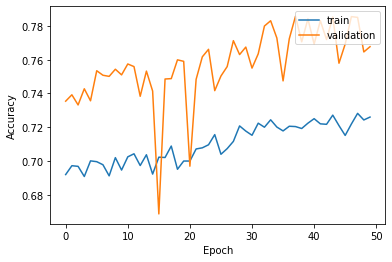

In [29]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(hist1.epoch, np.array(hist1.history['accuracy']), label='accuracy')
plt.plot(hist1.epoch, np.array(hist1.history['val_accuracy']), label = 'Val accuracy')
plt.legend(['train', 'validation'], loc='upper right')

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

monitor = EarlyStopping(monitor='val_accuracy',patience=20, verbose = 1, restore_best_weights=True)
hist1 = model1.fit(X_train, y_train, epochs=50,batch_size=50,validation_data=(X_test, y_test),callbacks=[monitor])

Epoch 1/50
210/210 [==============================] - 1s 2ms/step - loss: 0.2491 - accuracy: 0.5202 - val_loss: 0.2472 - val_accuracy: 0.5532
Epoch 2/50
210/210 [==============================] - 0s 2ms/step - loss: 0.2477 - accuracy: 0.5479 - val_loss: 0.2469 - val_accuracy: 0.5532
Epoch 3/50
210/210 [==============================] - 0s 2ms/step - loss: 0.2475 - accuracy: 0.5468 - val_loss: 0.2463 - val_accuracy: 0.5532
Epoch 4/50
210/210 [==============================] - 0s 2ms/step - loss: 0.2468 - accuracy: 0.5461 - val_loss: 0.2454 - val_accuracy: 0.5532
Epoch 5/50
210/210 [==============================] - 0s 2ms/step - loss: 0.2439 - accuracy: 0.5539 - val_loss: 0.2392 - val_accuracy: 0.5532
Epoch 6/50
210/210 [==============================] - 0s 2ms/step - loss: 0.2400 - accuracy: 0.5891 - val_loss: 0.2321 - val_accuracy: 0.6308
Epoch 7/50
210/210 [==============================] - 0s 2ms/step - loss: 0.2345 - accuracy: 0.6141 - val_loss: 0.2336 - val_accuracy: 0.6108
Epoch 

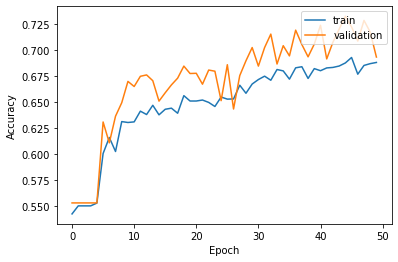

In [31]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(hist1.history['accuracy'], label='accuracy')
plt.plot(hist1.history['val_accuracy'], label = 'Val accuracy')
plt.legend(['train', 'validation'], loc='upper right')

Câu 2: (3.5 điểm)
Vẫn sử dụng dữ liệu của bài toán 1. Viết chương trình sử dụng mạng RNN (hoặc các mạng cải tiến của nó như LSTM, GRU) để giải quyết bài toán.

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=50)

In [32]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [33]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.constraints import MaxNorm

model2 = Sequential()
model2.add(LSTM(units= 28, activation='sigmoid', return_sequences=True, input_shape=(X_train.shape[1],1)))
model2.add(Dropout(0.2))
model2.add(LSTM(units=20, activation='sigmoid', return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(units=10, activation='sigmoid', return_sequences=True))
model2.add(Dense(units=1))

model2.compile(optimizer='adam',  loss='mean_squared_error', metrics=['accuracy'])


print(X_train.shape)

hist2 = model2.fit(X_train, y_train, epochs=100,batch_size=32, validation_data=(X_test, y_test))



(10486, 14, 1)
Epoch 1/100
328/328 [==============================] - 9s 18ms/step - loss: 0.2570 - accuracy: 0.5357 - val_loss: 0.2479 - val_accuracy: 0.5532
Epoch 2/100
328/328 [==============================] - 8s 23ms/step - loss: 0.2492 - accuracy: 0.5418 - val_loss: 0.2487 - val_accuracy: 0.5532
Epoch 3/100
328/328 [==============================] - 5s 17ms/step - loss: 0.2491 - accuracy: 0.5470 - val_loss: 0.2475 - val_accuracy: 0.5532
Epoch 4/100
328/328 [==============================] - 5s 17ms/step - loss: 0.2487 - accuracy: 0.5385 - val_loss: 0.2471 - val_accuracy: 0.5532
Epoch 5/100
328/328 [==============================] - 5s 17ms/step - loss: 0.2477 - accuracy: 0.5485 - val_loss: 0.2479 - val_accuracy: 0.5531
Epoch 6/100
328/328 [==============================] - 6s 17ms/step - loss: 0.2474 - accuracy: 0.5501 - val_loss: 0.2472 - val_accuracy: 0.5532
Epoch 7/100
328/328 [==============================] - 5s 17ms/step - loss: 0.2479 - accuracy: 0.5499 - val_loss: 0.2476 

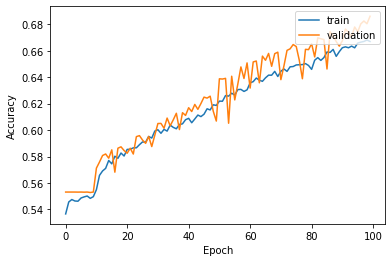

In [20]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(hist2.epoch, np.array(hist2.history['accuracy']), label='accuracy')
plt.plot(hist2.epoch, np.array(hist2.history['val_accuracy']), label = 'Val accuracy')
plt.legend(['train', 'validation'], loc='upper right')

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

monitor = EarlyStopping(monitor='val_accuracy',patience=20, verbose = 1, restore_best_weights=True)
hist2 = model2.fit(X_train, y_train, epochs=100,batch_size=32,validation_data=(X_test, y_test),callbacks=[monitor])

Epoch 1/100
328/328 [==============================] - 9s 19ms/step - loss: 0.2045 - accuracy: 0.6665 - val_loss: 0.1987 - val_accuracy: 0.6831
Epoch 2/100
328/328 [==============================] - 6s 18ms/step - loss: 0.2033 - accuracy: 0.6689 - val_loss: 0.1985 - val_accuracy: 0.6853
Epoch 3/100
328/328 [==============================] - 6s 18ms/step - loss: 0.2033 - accuracy: 0.6703 - val_loss: 0.1972 - val_accuracy: 0.6891
Epoch 4/100
328/328 [==============================] - 6s 17ms/step - loss: 0.2014 - accuracy: 0.6737 - val_loss: 0.1960 - val_accuracy: 0.6861
Epoch 5/100
328/328 [==============================] - 6s 17ms/step - loss: 0.2028 - accuracy: 0.6696 - val_loss: 0.1998 - val_accuracy: 0.6799
Epoch 6/100
328/328 [==============================] - 6s 18ms/step - loss: 0.2024 - accuracy: 0.6711 - val_loss: 0.1981 - val_accuracy: 0.6790
Epoch 7/100
328/328 [==============================] - 6s 18ms/step - loss: 0.2018 - accuracy: 0.6721 - val_loss: 0.1973 - val_accuracy:

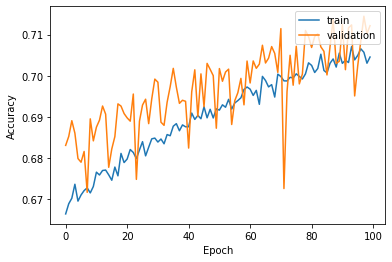

In [37]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(hist2.history['accuracy'], label='accuracy')
plt.plot(hist2.history['val_accuracy'], label = 'Val accuracy')
plt.legend(['train', 'validation'], loc='upper right')